# Prestige and Diffusion in Networks


## Part A. Eigenvector Centrality & PageRank (10 points)

1. (Eigenvector Centrality, 5 pts)

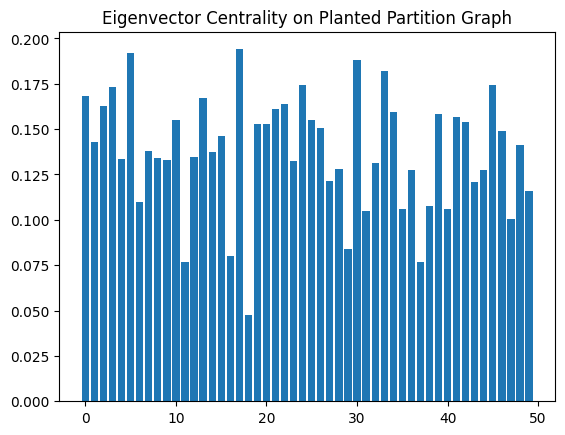

In [45]:
import networkx as nx
import matplotlib.pyplot as plt

G1 = nx.planted_partition_graph(l=2, k=25, p_in=0.4, p_out=0.05, seed=42)

centrality = nx.eigenvector_centrality(G1)
plt.title("Eigenvector Centrality on Planted Partition Graph")
plt.bar(list(centrality.keys()), list(centrality.values()))
plt.show()

2. (PageRank, 5 pts)

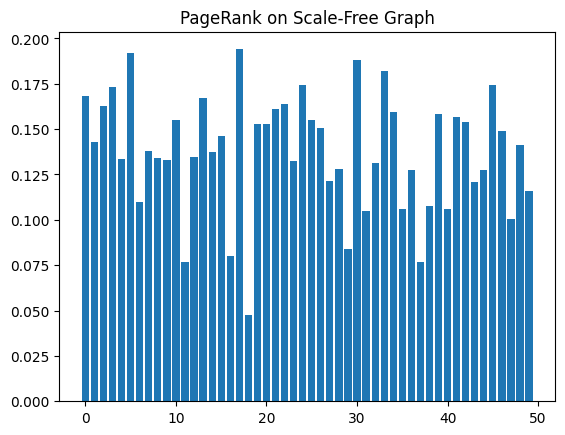

In [46]:
G2 = nx.scale_free_graph(50, seed=42).to_directed()
pagerank = nx.pagerank(G2)

plt.title("PageRank on Scale-Free Graph")
plt.bar(list(centrality.keys()), list(centrality.values()))
plt.show()

## Part B. Diffusion Models (20 points)

1. (SI Model, 6 pts)

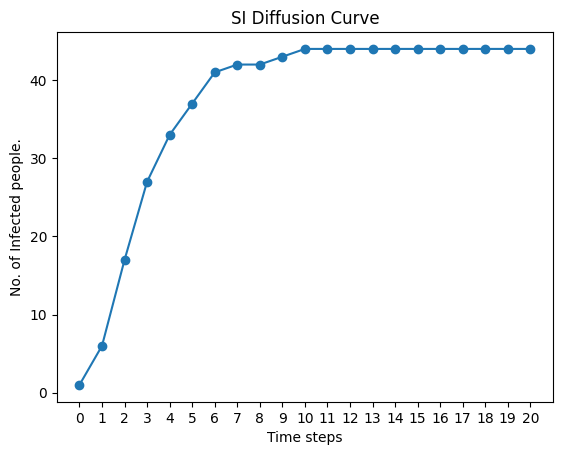

In [ ]:
import random


G3 = nx.erdos_renyi_graph(50, 0.05, seed=42)


def simulate_si(
    G: nx.Graph,
    starting_infected: list[int] = [0],
    infection_prob: float = 0.3,
    steps: int = 20,
) -> list[int]:
    for x in starting_infected:
        if x not in G.nodes:
            raise Exception("Illegal initial conditions.")

    infected = set(starting_infected)
    history: list[int] = [len(infected)]
    for step in range(steps):
        new_infected: set[int] = set()
        for x in infected:
            for n in G.neighbors(x):
                if random.random() >= infection_prob:
                    new_infected.add(n)
        infected.update(new_infected)
        history.append(len(infected))

    return history


history = simulate_si(G3)

plt.title("SI Diffusion Curve")
plt.plot(
    range(len(history)), history, marker="o", linestyle="-", label="Value over Time"
)

plt.xlabel("Time steps")
plt.xticks(range(len(history)))

plt.ylabel("No. of Infected people.")

plt.show()

2. (SIR Model, 7 pts)

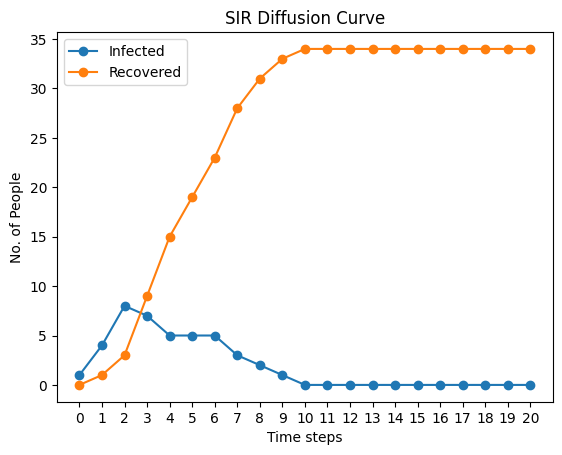

In [ ]:
def simulate_sir(
    G: nx.Graph,
    starting_infected: list[int] = [0],
    infection_prob: float = 0.3,
    recovery_prob: float = 0.1,
    steps: int = 20,
) -> list[tuple[int, int]]:
    for x in starting_infected:
        if x not in G.nodes:
            raise Exception("Illegal initial conditions.")

    infected = set(starting_infected)
    recovered = set()
    history: list[tuple[int, int]] = [(len(infected), len(recovered))]
    for step in range(steps):
        new_infected: set[int] = set()
        new_recovered: set[int] = set()
        for x in infected:
            for n in G.neighbors(x):
                if n in recovered:
                    continue

                if random.random() >= infection_prob:
                    new_infected.add(n)

            if random.random() >= recovery_prob:
                new_recovered.add(x)

        infected |= new_infected
        recovered |= new_recovered
        infected -= new_recovered
        history.append((len(infected), len(recovered)))

    return history


history = simulate_sir(G3)

infected = [x[0] for x in history]
recovered = [x[1] for x in history]

plt.title("SIR Diffusion Curve")
plt.plot(range(len(history)), infected, marker="o", linestyle="-", label="Infected")
plt.plot(range(len(history)), recovered, marker="o", linestyle="-", label="Recovered")

plt.legend()

plt.xlabel("Time steps")
plt.xticks(range(len(history)))

plt.ylabel("No. of People")

plt.show()

3. (Threshold Model, 7 pts)

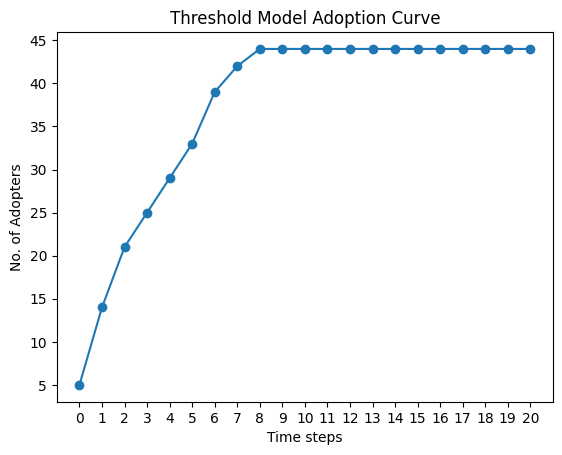

In [ ]:
def simulate_threshold(
    G: nx.Graph, adoption_threshold: float = 0.3, seeds: int = 5, steps: int = 20
) -> list[int]:
    adopters: set[int] = set(random.sample(list(G.nodes), seeds))
    history: list[int] = [len(adopters)]

    for step in range(steps):
        new_adopters = set()
        for x in G.nodes:
            neighbors = list(G.neighbors(x))
            if len(neighbors) > 0:
                r = sum(1 if n in adopters else 0 for n in neighbors) / len(neighbors)
            else:
                r = 0
            if r >= adoption_threshold:
                new_adopters.add(x)

        adopters |= new_adopters

        history.append(len(adopters))

    return history


history = simulate_threshold(G3)

plt.title("Threshold Model Adoption Curve")
plt.plot(range(len(history)), history, marker="o", linestyle="-", label="Adopters")

plt.xlabel("Time steps")
plt.xticks(range(len(history)))

plt.ylabel("No. of Adopters")

plt.show()